## CSC 271 - Intro to Data Science
## Tue, Feb 18
## Lesson 08
## Working with external data

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## **Task 1:** Importing data from csv files.  In Pandas, this is super easy and gives us a DataFrame to work with ... 

In [3]:
class_df = pd.read_csv('data/gradeData.csv') #this allows us to read csv data into a dataframe

class_df

,name,HW 1,HW 2,HW 3,Exam 1,Exam 2,Final Exam
0,PTS,30,30,30,100,100,100
1,Joe,23,24,22,88,89,91
2,Mary,25,23,24,87,92,80
3,Linda,27,26,23,59,91,82
4,Mark,22,30,25,90,86,89
5,Tim,20,26,12,76,69,58
6,Dennis,29,23,25,70,100,93
7,Wally,29,29,29,99,99,99
8,Alice,30,22,28,91,65,91
9,Jim,23,22,30,81,87,85


**(Explore)** Sort by final exam to see if any students seem to be doing especially poorly.

**(Explore)** Filter and view only rows for students who scored 90 or above on the final.  

**(Explore)** Filter and view only rows for students who scored less than 60 on either Exam 1 or 2. 

In [4]:
class_df.sort_values(by='Final Exam',ascending=False)
_90_above = class_df["Final Exam"] >= 90 #filter to show students who score 90 or above on the final
class_df[_90_above]

Exam_1 = class_df["Exam 1"] < 60 #filtering to find exam 1 scores less than 60
Exam_2 = class_df["Exam 2"] < 60 #filtering to find exam 2 scores less than 60

students_exam = class_df[Exam_1 | Exam_2]
students_exam

,name,HW 1,HW 2,HW 3,Exam 1,Exam 2,Final Exam
3,Linda,27,26,23,59,91,82
17,Danny,15,15,15,50,50,50
20,Benny,12,16,20,70,54,64


**(Analyze)** Compute the final course score for all students with scores weighted by 30\% for the HW average, 20\% for Exams 1 and 2, and 30\% for the Final Exam.  Add a new column to the DataFrame for the final course score.  
 

**(Visualize)** Compute the average score for each assignment type (HW 1, HW 2, Exam 1, Exam 2, and Final Exam).  Use **plt.bar()** to create a bar chart showing the results.  

**(Visualize)** Use **plt.hist()** to create a histogram of the final course scores.

**(Visualize)** Write code to collect the number of final grades that are A, B, C, D, F (using the standard 90,80,... scale, no $\pm$ grades).  Use **plt.bar()** to create a bar chart showing the results.  


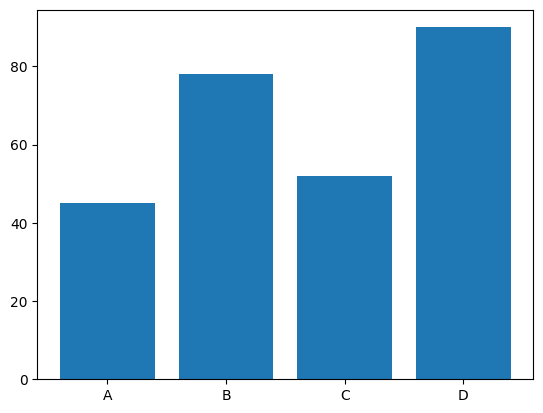

In [5]:
# Quick aside: example of a bar chart

categories = ['A','B','C','D']
values = [45, 78, 52, 90]

plt.bar(categories,values)
plt.show()

In [ ]:
homework = 0.3 * (class_df["HW 1"] + class_df["HW 2"] + class_df["HW 3"])/90

exam = 0.2*(class_df["Exam 1"]) + 0.2*(class_df["Exam 2"])

finals = 0.3*class_df["Final Exam"]

course_score = homework+exam+finals
course_score
class_df(course_score, column=["Final Course Score"])

In [ ]:
new_column = 0.3 * (class_df["HW 1"] + class_df["HW 2"] + class_df["HW 3"])/0.90 + 0.2*(class_df["Exam 1"]) + 0.2*(class_df["Exam 2"]) + 0.3*class_df["Final Exam"]

class_df["Final Course Score"] = new_column
class_df

In [15]:
np.mean(class_df["HW 1"][1:])
np.average(class_df["HW 1"][1:])

np.float64(23.8)

In [ ]:
#class_df.T
(class_df.T)['avg'] = pd.Series()

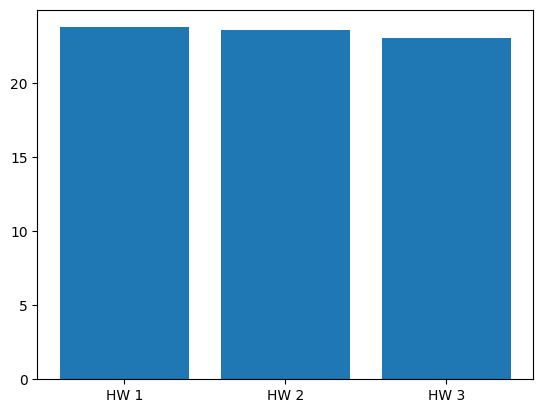

In [16]:


categories = ["HW 1", "HW 2", "HW 3"]
values = [(np.mean(class_df["HW 1"][1:])), (np.mean(class_df["HW 2"][1:])), (np.mean(class_df["HW 3"][1:]))]

plt.bar(categories,values)
plt.show()

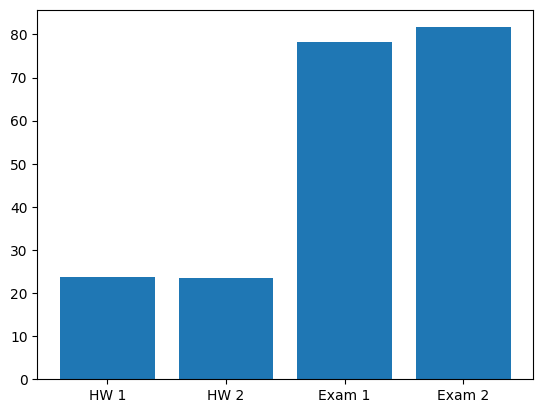

In [37]:
categories = ["HW 1", "HW 2", "Exam 1", "Exam 2"]
values = [(np.mean(class_df["HW 1"][1:])), (np.mean(class_df["HW 2"][1:])), (np.mean(class_df["Exam 1"][1:])), (np.mean(class_df["Exam 2"][1:]))]

plt.bar(categories,values)
plt.show()

(array([1., 0., 0., 0., 1., 0., 1., 0., 1., 2., 2., 7., 1., 5., 4., 3., 1.,
        0., 0., 2.]),
 array([ 50. ,  52.5,  55. ,  57.5,  60. ,  62.5,  65. ,  67.5,  70. ,
         72.5,  75. ,  77.5,  80. ,  82.5,  85. ,  87.5,  90. ,  92.5,
         95. ,  97.5, 100. ]),
 <BarContainer object of 20 artists>)

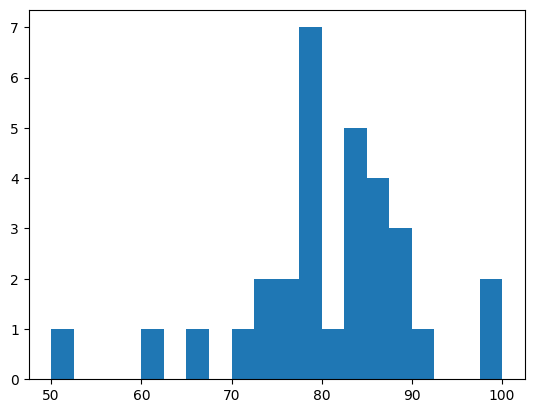

In [17]:
plt.hist(class_df['Final Course Score'], bins=20)

In [ ]:
class_df.sort_values(by="Final Course Scores")

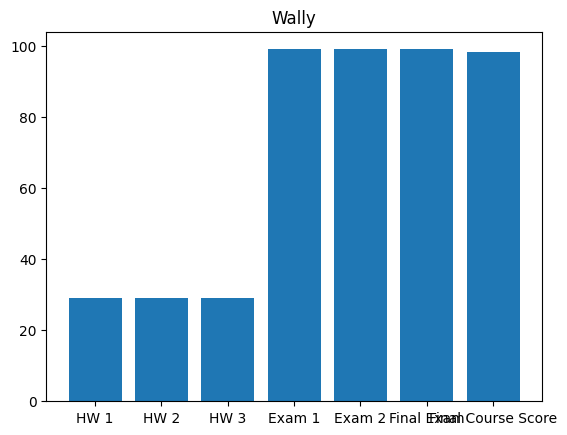

In [43]:
# Here is a little example of creating a report for each student
# note the use of slicing with iloc, transpose to get rows, bar chart, ... 

num=7
name=class_df.iloc[num,0]
scores = list(class_df.iloc[num,1:])
categories = list(class_df.T.index.values)[1:]
plt.bar(categories,scores)
plt.title(name)
plt.show()

**(Analyze/Interpret)** How did the course go from the instructor's point of view?  Did everyone pass the course?  Does the distribution of final grades seem reasonable? Use any tools or methods that seem reasonable to help address this. 


# **Task 2:** Reading/writing data using filestreams.  

We'll do more with these in the future.  For now, just one quick example of reading from a file and another for writing to a file.   

In [44]:
# create a new filestream for writing to
f=open('data/new_data_file.txt','w')

f.write('0, 0 \n')

# generate some data and write to the file 
x=0
for i in range(1,10):
    x = x + np.random.randn()
    s = '{a}, {b} \n'.format(a=i,b=x)
    f.write(s)
    
f.close()

0, 0 

1, -1.3329043831590277 

2, -2.358657001293441 

3, -1.6978391413040608 

4, -1.7615782796170365 

5, -0.5326755773252863 

6, -1.4216522916128316 

7, -1.105740671399977 

8, 0.7674371929435035 

9, 2.0592684799991567 



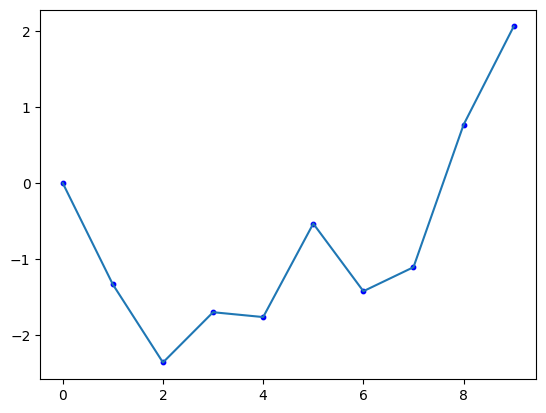

In [45]:
# open an existing filestream for reading
f=open('data/new_data_file.txt','r')

x_list=[]
y_list=[]

# read and process the file one line at a time 
while True:
    line = f.readline()

    if line =='':
        break
        
    # read each line in as a string, break at commas, and process into numerical values
    vals = line.split(',')
    x=int(vals[0])
    y=float(vals[1])
    
    # collect values into lists 
    x_list.append(x)
    y_list.append(y)

    print(line)  # <-- comment this out if there is a lot of data to process
    
f.close()

# plot the data from the external file
plt.plot(x_list,y_list)
plt.scatter(x_list,y_list,s=10,c='b')
plt.show()

---

One last example ...

In [46]:
# open a filestream for reading
f_in=open('data/secret_message.txt','r')


# read and process the file one line at a time 
while True:
    line = f_in.readline()

    if line =='':
        break

    # process each line one char at a time
    newline=''
    for c in line:
        newline+=c

    print(newline)

    
f_in.close()
f_out.close()

Gspn!uif!ijmmt!pg!Nbjof!up!uif!xftufso!qmbjo-

Ps!xifsf!uif!dpuupo!jt!cmpxjoh<

Gspn!uif!hmppnz!tibef!pg!uif!opsuifso!qjof-

Up!uif!mjhiu!pg!uif!tpvuifso!tfbt<

Uifsfâ€št!b!obnf!ifme!efbs!boe!b!dpmps!xf!diffs

Xifsfwfs!xf!gjoe!ju!hmpxjoh<

Boe!uif!ufbst!xjmm!sjtf!up!pvs!mpohjoh!fzft

Bt!ju!gmpbut!po!uif!fwfojoh!csff{f/



Xifo!uif!ebz!jt!epof!boe!uif!xftufso!tvo

Jt!qbjoujoh!jo!gmbtijoh!hmpsz<

Bdsptt!uif!tljft!xjui!hpshfpvt!ezft

Uif!dpmps!xf!mpwf!tp!xfmm<

Xf!mpwf!up!tju!bt!uif!tibepxt!gmju

Boe!qsbjtf!ju!jo!tpoh!boe!tupsz<

Xf!mpwf!up!tipvu!bt!uif!mjhiu!ejft!pvu

B!hppe!pme!Xbcbti!zfmm/



Pvs!qsbzfst!bsf!bmxbzt!uijof-!pvs!wpjdft!boe!ifbsut!dpncjof-

Up!tjoh!uiz!qsbjtf!xifo!gvuvsf!ebzt!tibmm!csjoh!uiz!obnf!cfgpsf!vt/

Xifo!dpmmfhf!ebzt!bsf!qbtu-!bt!mpoh!bt!mjgf!tibmm!mbtu-

Pvs!hsfbuftu!kpz!xjmm!cf!up!tipvu!uif!dipsvtâ€§//



Efbs!Pme!Xbcbti-!uiz!mpzbm!tpot!tibmm!fwfs!mpwf!uiff-

Boe!pâ€šfs!uiz!dmbttjd!ibmmt-!uif!Tdbsmfu!gmbh!tibmm!qspvemz!gmbti/

HP!XBCBTI"

NameError: name 'f_out' is not defined